In [1]:
# Data Wrangling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)

# Helper Functions
import AnalyseHelpers as a
import CleanseHelpers as c
from time import time
randomstate = np.random.seed(123)

# Models
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import manifold
from sklearn import datasets
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, classification_report, r2_score

# Visualisation
from matplotlib import offsetbox
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
import seaborn as sns
sns.set(font_scale=1)
# Set the styling for dataframes
dfstyles = [dict(selector="caption", props=[("font-size", "120%"),("color", "black"),("text-align", "center")])]
from IPython.display import display,HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>NOTE</b>: CleanseHelpers and AnalyseHelpers are supplementary modules, and should reside in the same directory as this notebook
<br>
The code for this notebook is, by default, hidden. To display the code cells, click <a href="javascript:code_toggle()">here</a>.\r\n''')

## Executive Summary
The objective of this report is to explore a dataset extracted from the 1994 Census database, using the following conditions:<br> ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).<br><br> Analysis, focusses on using various visual analytics techniques to identify important structure in the data; to determine whether a person earns over 50K a year.

Data Source: https://archive.ics.uci.edu/ml/datasets/Census+Income

## Problem Definition
Using 1994 Census data, the task is to explore the data and provide conclusions on important structure in the data, relevant for the classification of a person earning more or less than £50k per year.  

## Preliminary Data Exploration

### Consolidation

In [2]:
# Import training data to df from arff file
sourcedata = '../Assessment/CW_Data/adult.csv'
columnnames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv(sourcedata, names = columnnames, sep=' *, *', na_values='?',engine='python')

#### Attribute Description
1. **age**:continuous.<br>
1. **workclass**:Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
1. **fnlwgt**:continuous.<br>
1. **education**:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
1. **education-num**:continuous.<br>
1. **marital-status**:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
1. **occupation**:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
1. **relationship**:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
1. **race**:White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
1. **sex**:Female, Male.<br>
1. **capital-gain**:continuous.<br>
1. **capital-loss**:continuous.<br>
1. **hours-per-week**:continuous.<br>
1. **native-country**:United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
1. **income**:>50K, <=50K.<br>


In [3]:
# Profile the data using helper function
display(a.dataprofile(df).style.set_table_styles(dfstyles).set_caption('Data profile: Census data'))

,Column,Max Length Value,Max Length,Min Length Value,Min Length,Null #,Null %,Data Type,Unique Values,Row Count,Mean,Max,Min
0,age,39,2,39,2,0,0,int64,73,32561,38.5816,90,17
1,workclass,Self-emp-not-inc,16,nan,3,1836,5.64,string,8,32561,N/A,N/A,N/A
2,fnlwgt,1033222,7,77516,5,0,0,int64,21648,32561,189778,1484705,12285
3,education,Some-college,12,9th,3,0,0,string,16,32561,N/A,N/A,N/A
4,education-num,13,2,9,1,0,0,int64,16,32561,10.0807,16,1
5,marital-status,Married-spouse-absent,21,Widowed,7,0,0,string,7,32561,N/A,N/A,N/A
6,occupation,Handlers-cleaners,17,nan,3,1843,5.66,string,14,32561,N/A,N/A,N/A
7,relationship,Other-relative,14,Wife,4,0,0,string,6,32561,N/A,N/A,N/A
8,race,Asian-Pac-Islander,18,White,5,0,0,string,5,32561,N/A,N/A,N/A
9,sex,Female,6,Male,4,0,0,string,2,32561,N/A,N/A,N/A


One can see from the above table that there are 15 columns and 32561 observations. Categorical variables: workclass, occupation and native-country have null values denoted by "?". There are two data types: strings and integers.

In [4]:
# Impute missing values with most frequent
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [5]:
# Create numerical attribute for income category
df['income'] = df['income'].replace('<=50K','0').replace('>50K','1').astype(int)

### Demographic Analysis

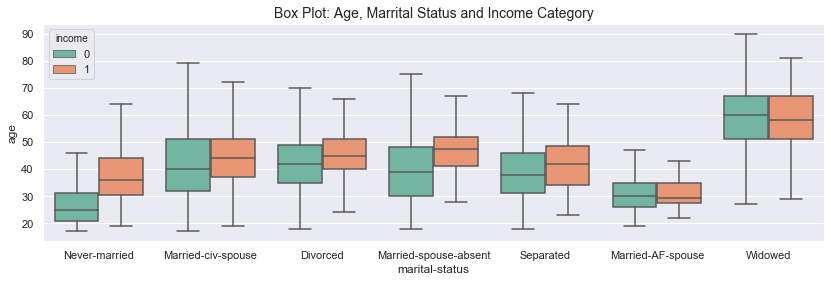

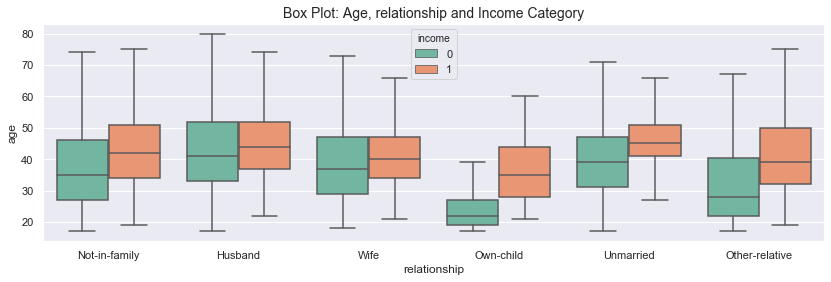

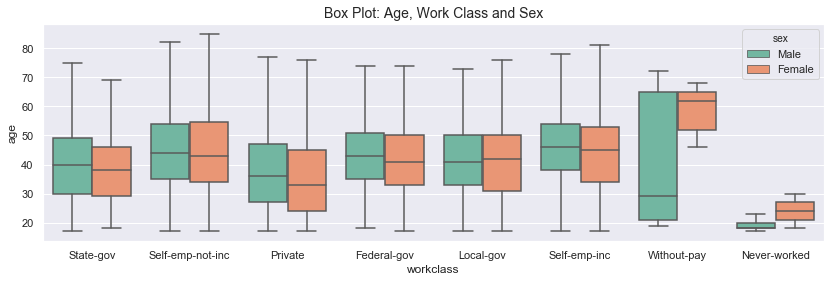

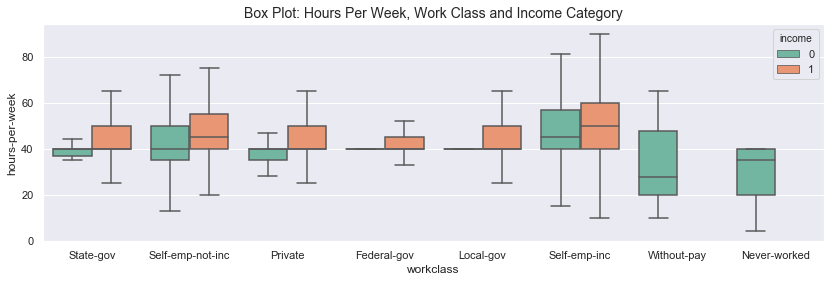

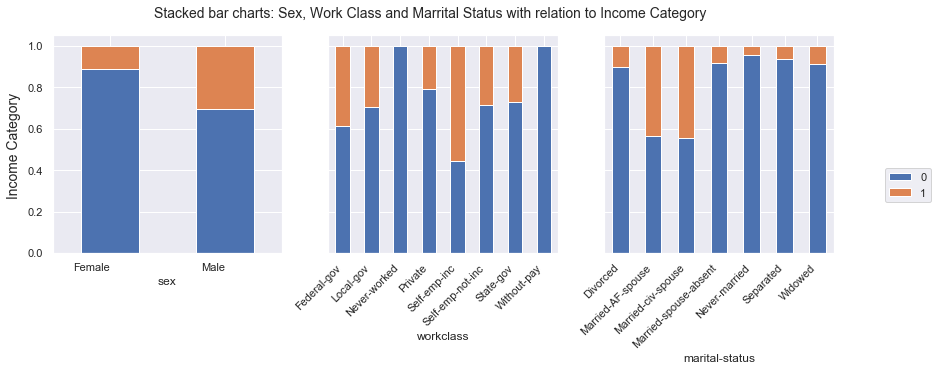

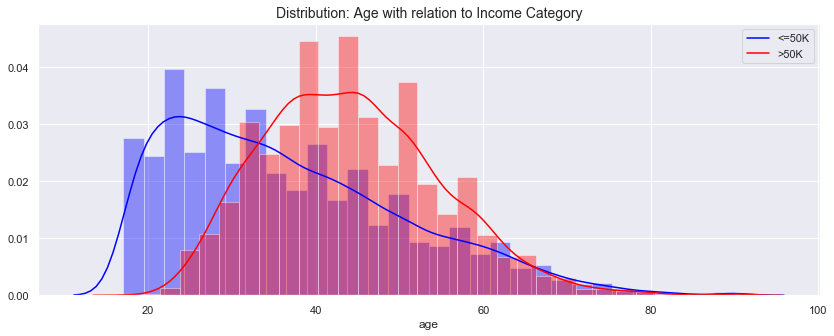

In [6]:
plt.rcParams['figure.figsize'] = [14.0, 4.0]
ax = sns.boxplot(y='age', x="marital-status",hue="income" ,data=df, palette="Set2", showfliers=False).set_title("Box Plot: Age, Marrital Status and Income Category", size=14)
plt.show()

ax = sns.boxplot(y='age', x="relationship",hue="income" ,data=df, palette="Set2", showfliers=False).set_title("Box Plot: Age, relationship and Income Category", size=14)
plt.show()

ax = sns.boxplot(y="age", x="workclass",hue="sex" ,data=df, palette="Set2",showfliers=False).set_title("Box Plot: Age, Work Class and Sex", size=14)
plt.show()

ax = sns.boxplot(y='hours-per-week', x="workclass",hue="income" ,data=df, palette="Set2",showfliers=False).set_title("Box Plot: Hours Per Week, Work Class and Income Category", size=14)
plt.show()


fig, axes = plt.subplots(1, 3, sharey=True)
axes = axes.flatten()
fig.suptitle('Stacked bar charts: Sex, Work Class and Marrital Status with relation to Income Category', size =14)

stable=pd.crosstab(df.sex,df['income'])
stable.div(stable.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = axes[0], legend=False)
plt.xlabel('Sex')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=0, horizontalalignment='right')

etable=pd.crosstab(df['workclass'],df['income'])
etable.div(etable.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = axes[1], legend=False)
plt.xlabel('Income-Category')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45, horizontalalignment='right')

mtable=pd.crosstab(df['marital-status'],df['income'])
mtable.div(mtable.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = axes[2], legend=False)
plt.xlabel('marital-status')
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45, horizontalalignment='right')
fig.legend(stable,loc = 5)
fig.text(0.08, 0.5, 'Income Category', va='center', rotation='vertical', size=14)
plt.show()

underfifty = df[df['income'] == 0]["age"]
overfifty = df[df['income'] == 1]["age"]
plt.rcParams['figure.figsize'] = [14,5]
plt.title('Distribution: Age with relation to Income Category', size=14)
sns.distplot(underfifty,kde=True,bins=30, color="blue", kde_kws={"label": "<=50K"}, hist=True)
sns.distplot(overfifty,kde=True,bins=30, color="red",kde_kws={"label": ">50K"})
plt.show()


In [7]:
# Create dummy varibles from the categorical observations
catlist = df.select_dtypes(include='object').columns
df_prepared = pd.get_dummies(data=df, columns=catlist)

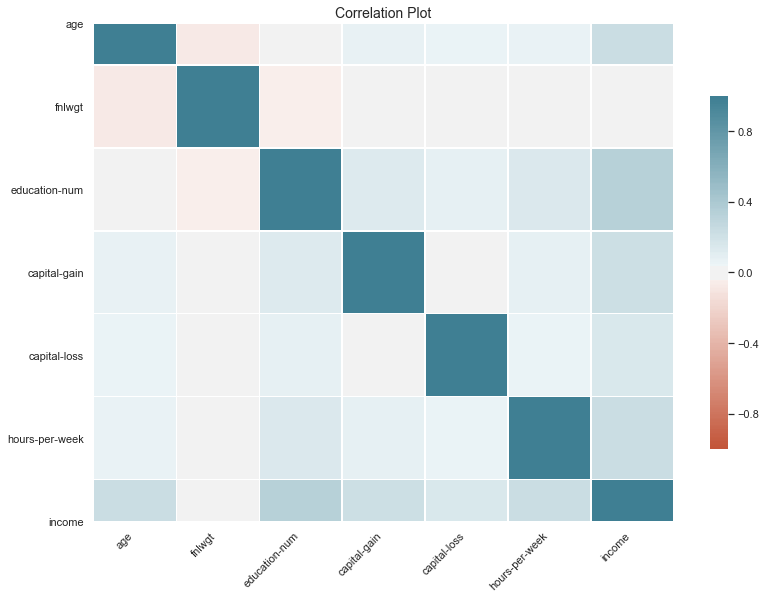

In [8]:
plt.rcParams['figure.figsize'] = [13.0, 13.0]
# Correlation plot for Numerical variables

ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.5},
    #annot=True,
    #annot_kws={"size": 12}
)

ax.set_title("Correlation Plot",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

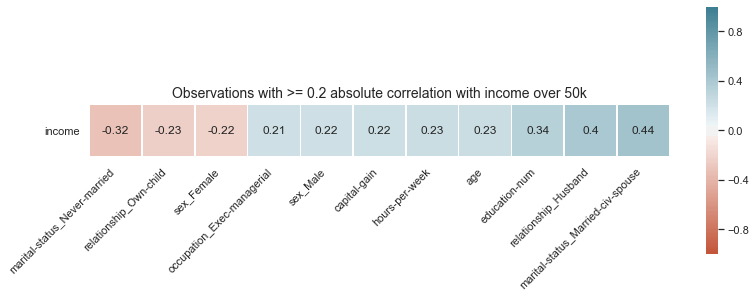

In [9]:
corr = df_prepared.corr()
# Observations with significant +ve or -ve correllation with over 50k
corr2 = pd.DataFrame(corr['income'][(corr['income'].abs() < 1) & (corr['income'].abs() >= 0.2)])

ax = sns.heatmap(
    corr2.sort_values(by='income').T, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=0.5 , cbar_kws={"shrink": 0.35},
    annot=True,
    annot_kws={"size": 12}
)

ax.set_title("Observations with >= 0.2 absolute correlation with income over 50k",size= 14)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.show()

## Visual Analytics

In [10]:
# Scale and split all features
scaler = StandardScaler()
X = df_prepared.drop(['income'],axis =1)
X_scaled = np.array(pd.DataFrame(scaler.fit_transform(X), columns = X.columns))
y = np.array(df_prepared['income'])

# Split Data into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state = randomstate)
print("Training Shape: X =", X_train.shape, "y =", y_train.shape)
print("Test Shape: X =", X_test.shape, "y =",y_test.shape)

Training Shape: X = (16280, 105) y = (16280,)
Test Shape: X = (16281, 105) y = (16281,)


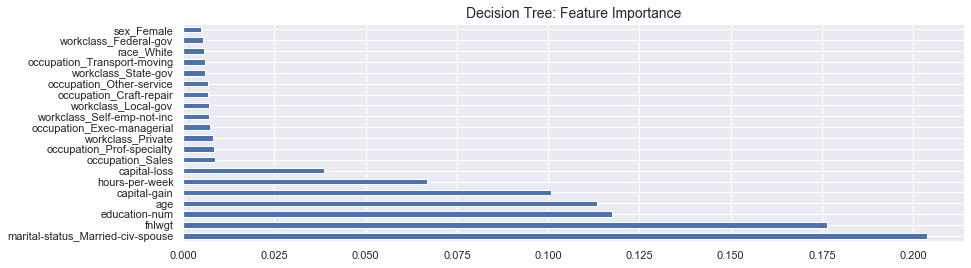

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12331
           1       0.61      0.63      0.62      3950

    accuracy                           0.81     16281
   macro avg       0.75      0.75      0.75     16281
weighted avg       0.82      0.81      0.81     16281



In [11]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test, dt_preds))

In [12]:
# Re-Scale and split continuous features only
scaler = StandardScaler()
X = df_prepared[['fnlwgt','capital-gain','capital-loss','age', 'education-num', 'hours-per-week']]
X_scaled = np.array(pd.DataFrame(scaler.fit_transform(X), columns = X.columns))
y = np.array(df_prepared['income'])

# Split Data into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state = randomstate)
print("Training Shape: X =", X_train.shape, "y =", y_train.shape)
print("Test Shape: X =", X_test.shape, "y =",y_test.shape)

Training Shape: X = (16280, 6) y = (16280,)
Test Shape: X = (16281, 6) y = (16281,)


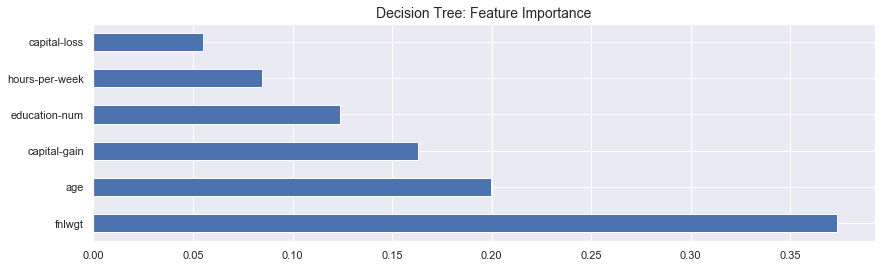

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     12367
           1       0.52      0.54      0.53      3914

    accuracy                           0.77     16281
   macro avg       0.69      0.69      0.69     16281
weighted avg       0.77      0.77      0.77     16281



In [13]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test, dt_preds))

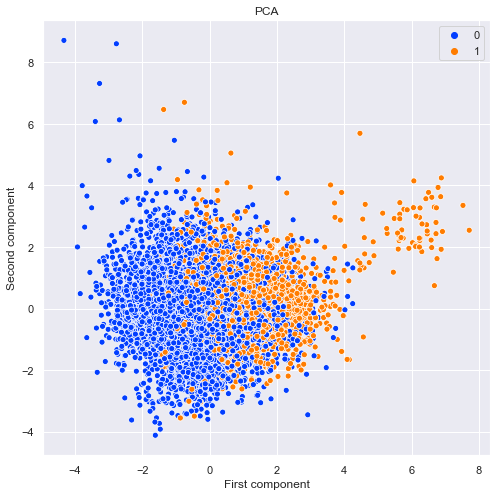

explained variance ratio (first  6  components): [0.21902708 0.17834867 0.16811675 0.15474482 0.14841426 0.13134843]


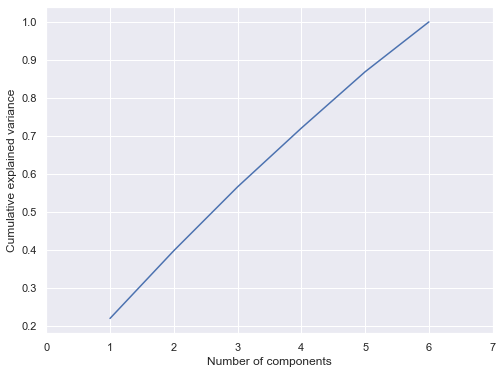

In [14]:
cmap = sns.color_palette("bright", 2)
comp = 6

pca = PCA(n_components=comp)
X_r = pca.fit(X_train).transform(X_train)
X_r_test = pca.fit(X_test).transform(X_test)

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.figure()
ax = sns.scatterplot(X_r[:,0],X_r[:,1], hue=y_train, palette= cmap)
plt.title('PCA')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

# Percentage of variance explained for each components
print('explained variance ratio (first ', comp, ' components):', str(pca.explained_variance_ratio_))

plt.rcParams['figure.figsize'] = [8.0, 4.0]

plt.figure(figsize=(8,6))
plt.plot(range(1,comp+1,1),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,comp+1,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


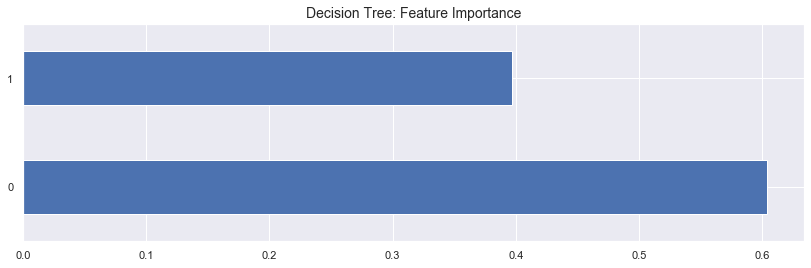

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     12367
           1       0.39      0.35      0.37      3914

    accuracy                           0.71     16281
   macro avg       0.60      0.59      0.59     16281
weighted avg       0.70      0.71      0.71     16281



In [15]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_r[:,0:2],y_train)
dt_preds = dt.predict(X_r_test[:,0:2])

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=[0,1])
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test, dt_preds))

Computing MDS embedding
Done. Stress: 240431.117656


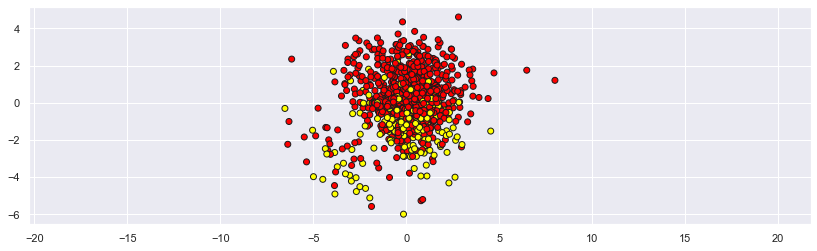

In [18]:
comp = 2
n_points = 1000 #len(X_scaled) 

print("Computing MDS embedding")
clf = manifold.MDS(n_components=comp, n_jobs = -1)
#t0 = time()
X_mds = clf.fit_transform(X_scaled[:n_points])
print("Done. Stress: %f" % clf.stress_)

plt.scatter(X_mds[:,0],X_mds[:,1],c=y[:n_points],cmap="autumn",edgecolor='k')
plt.axis('equal');
plt.show()


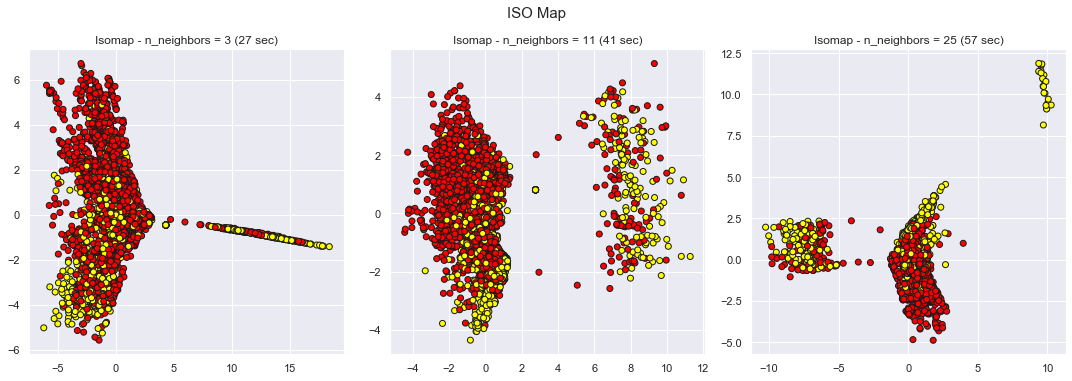

In [49]:
plt.rcParams['figure.figsize'] = [15.0, 5.0]
n_neighbors = [3,11,25]
n_points = 5000 # df.shape(0)
comp = 3
fig, axes = plt.subplots(1, 3, sharey = False)
fig.suptitle('ISO Map', y=1.05, fontsize=15)
axes = axes.flatten()
for i, n in enumerate(n_neighbors, start=0): 
    t0 = time()
    X_iso = manifold.Isomap(n_neighbors = n, n_components=comp)\
        .fit_transform(X_scaled[:n_points]).T
    X_iso_test = manifold.Isomap(n_neighbors = n, n_components=comp)\
        .fit_transform(X_test[:n_points]).T 
    t1 = time()
    axes[i].scatter(X_iso[0], X_iso[1],c=y[:n_points].T,cmap="autumn",edgecolor='k')
    axes[i].set_title(("%s (%.2g sec)" % ('Isomap - n_neighbors = ' + str(n) , t1 - t0)))
    plt.tight_layout()
plt.show()


In [47]:
iso_df = pd.DataFrame(X_iso).T
iso_test_df = pd.DataFrame([X_iso_test[0],X_iso_test[1]]).T

In [48]:
iso_df

,0,1
0,-0.030925,1.749245
1,0.860634,-0.180599
2,-0.154306,-0.448545
3,-0.261627,-1.189258
4,-0.068782,0.908853
...,...,...
4995,0.675595,-2.140361
4996,-0.278824,-0.453554
4997,-0.253339,-0.337869
4998,-0.220388,0.067276


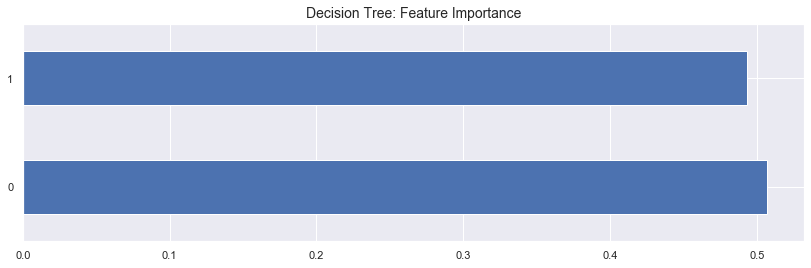

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      3757
           1       0.23      0.27      0.25      1243

    accuracy                           0.60      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.62      0.60      0.61      5000



In [45]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(iso_df,y_train[:n_points])
dt_preds = dt.predict(iso_test_df)

# plot feature importance
plt.rcParams['figure.figsize'] = [14,4]
feature_importances = pd.Series(dt.feature_importances_, index=[0,1])
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Decision Tree: Feature Importance", size="14")
plt.show()

print("Classification Report")
print(classification_report(y_test[:n_points], dt_preds))

In [24]:
X_iso[0:2,:]

array([[-0.03092531,  0.86063386, -0.15430597, ..., -0.25333871,
        -0.22038764,  0.89794177],
       [ 1.74924496, -0.18059938, -0.44854459, ..., -0.33786898,
         0.0672756 ,  0.27783572]])

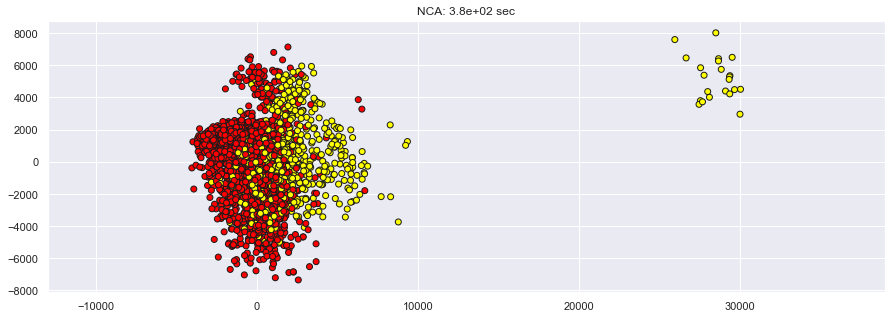

In [20]:
n_points = 5000
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=randomstate)
t0 = time()
X_nca = nca.fit_transform(X_scaled[:n_points],y[:n_points])
t1 = time()

plt.scatter(X_nca[:,0],X_nca[:,1],c=y[:n_points],cmap="autumn",edgecolor='k')
plt.axis('equal');
plt.title("%s: %.2g sec" % ('NCA', t1 - t0))
plt.show()

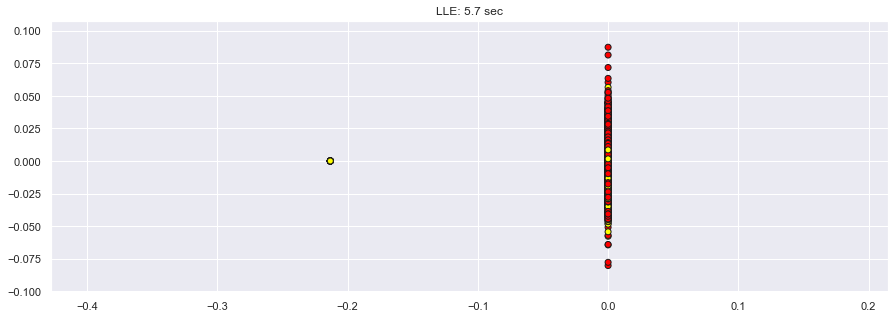

In [23]:
n_neighbors = 15
n_points = 5000
lle = manifold.LocallyLinearEmbedding(n_neighbors = n_neighbors, n_components=3, random_state=randomstate)
t0 = time()
X_lle = lle.fit_transform(X_scaled[:n_points])
t1 = time()

plt.scatter(X_lle[:,0],X_lle[:,1],c=y[:n_points],cmap="autumn",edgecolor='k')
plt.axis('equal');
plt.title("%s: %.2g sec" % ('LLE', t1 - t0))
plt.show()

TSNE, perplexity=5 in 43 sec


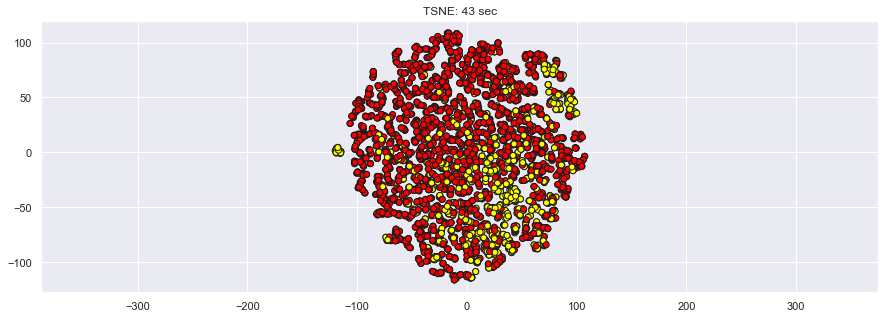

TSNE, perplexity=7 in 45 sec


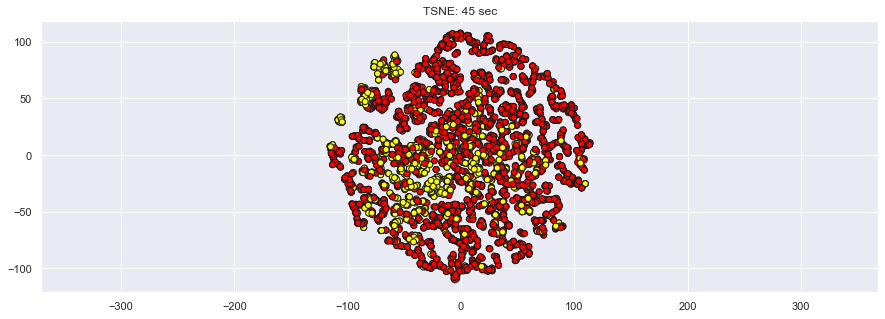

TSNE, perplexity=10 in 46 sec


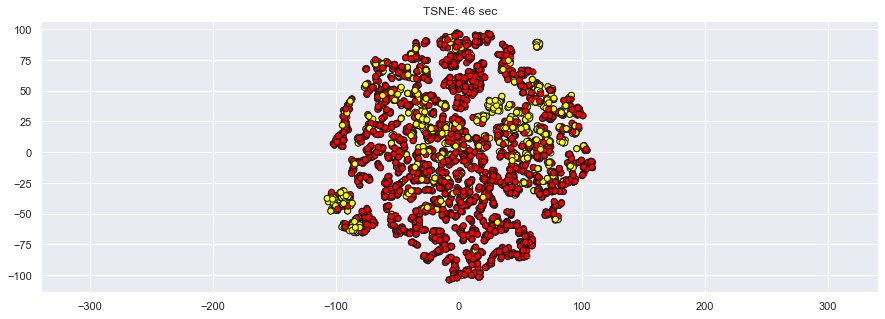

TSNE, perplexity=15 in 49 sec


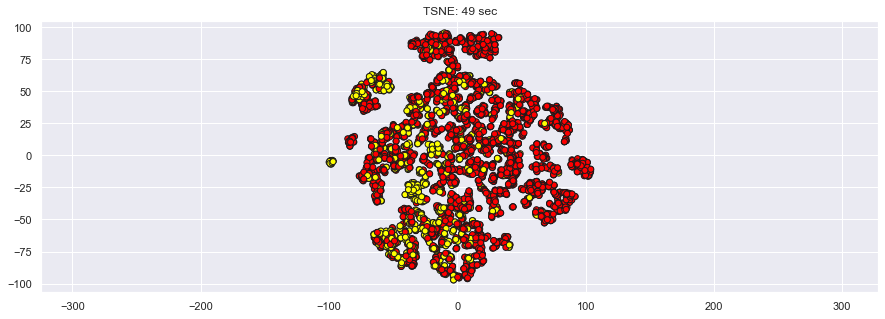

TSNE, perplexity=20 in 54 sec


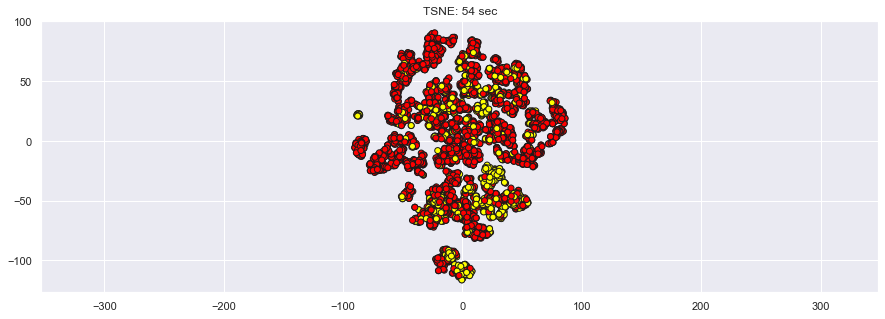

TSNE, perplexity=30 in 57 sec


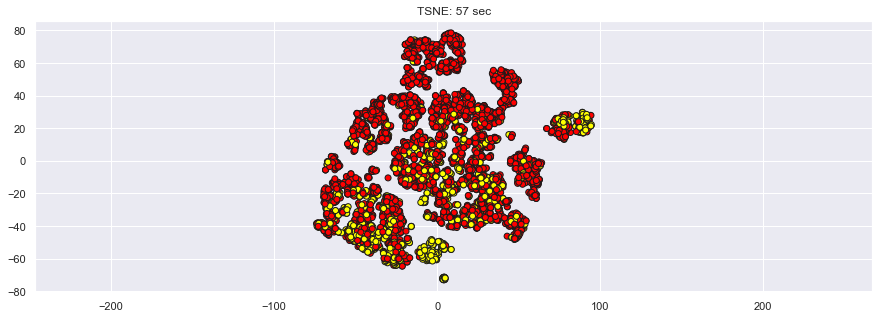

TSNE, perplexity=50 in 69 sec


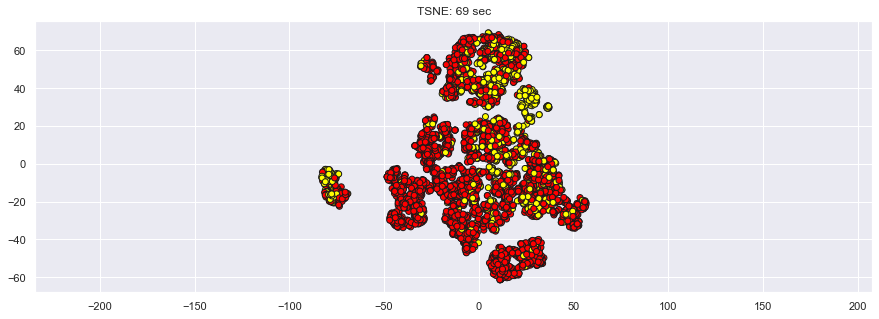

TSNE, perplexity=100 in 90 sec


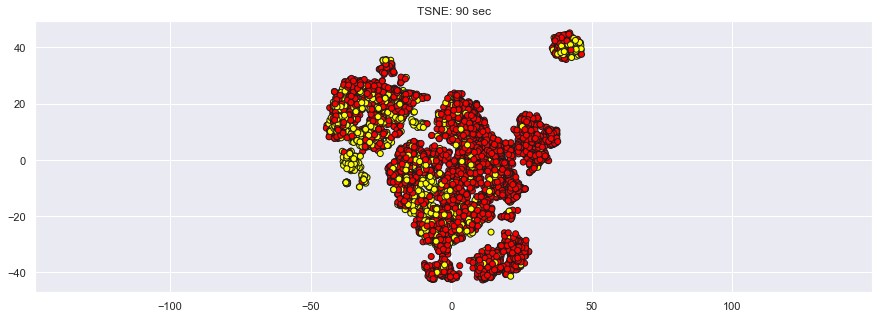

In [22]:
perplexity = [5,7,10,15,20,30,50,100]
n_points = 5000 # df.shape(0)
comp = 2
for p in perplexity:
    t0 = time()
    tsne = manifold.TSNE(n_components=comp, init='random', random_state=randomstate, perplexity=p)
    X_tsne = tsne.fit_transform(X_scaled[:n_points])
    t1 = time()
    print("TSNE, perplexity=%d in %.2g sec" % (p, t1 - t0))
    plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y[:n_points],cmap="autumn",edgecolor='k')
    plt.axis('equal');
    plt.title("%s: %.2g sec" % ('TSNE', t1 - t0))
    plt.show()